#Value Function Approximation - Compendio

Mario Fiorino

**Limiti dei metodi RL tabulari (look-up table):**

i requisiti di memoria per archiviare in una tabelle spazi di stato/azione molto grandi, oggi sembrano irrealizzabili; inoltre, visitare adeguatamente ciascuna coppia stato-azione richiede un tempo enorme


**Idea:**

superare tali limitazioni con  tecniche di approssimazione di funzioni. In pratica : si utilizza una funzione (ad esempio le reti neural) che approssima la value-fuction di ogni stato.

## Nozioni principali

**Modellizazzione lineare**

Idea è di approssimare la function value $v(s;\mathbf{w})$ , oppure la value-action $q$, con una funzione lineare parametrizzata dai i pesi $\mathbf{w}$:

$v(s;\mathbf{w}) =  \mathbf{w} ^\intercal \mathbf{x}(s) =  \sum_i ^d w_i x_i(s)  $


Dove il vettore colonna di dimensione $d$:

$\mathbf{x}(s) = (x_1(s), x_2(s),...,x_d(s) )^\intercal $

è detto **feature vector**; questo mappa ogni stato $s$ in $\mathbb{R}^d$. Precisamente i $d$ componenti, dette features, sono del tipo $ x_i : s → \mathbb{R}$.

In genere, il numero $d$ delle features è molto inferiore alla dimensione dello spazio degli stati.

Si assume che le features siano funzioni note.

I parametri $\mathbf{w}$ sono le "low-dimensional embeddings" che desideriamo apprendere.

Per maggiori info sulle "Feature Construction for Linear Methods" vedere il testo di Sutton & Barto, 2018, PDF 231


Maggiori info sul Linear Q-learning:

https://gibberblot.github.io/rl-notes/single-agent/function-approximation.html

Ref:

https://users.ece.cmu.edu/~yuejiec/ece18813B_notes/lecture16-linear-function-approximation.pdf


**Modellizzazione non lineare**

Questo tipo di modellizzazione utilizza funzioni non lineari per approssimare la funzione $v(s;\mathbf{w})$, in particolare usa reti neurali artificiali addestrate con la backpropagation. Ha guadagnato grande popolarità negli ultimi anni sotto il nome di **deep reinforcement learning**.

**Gradient Descent Algorithm**

Definita $J(\mathbf{w})$, funzione differenziabile rispetti il vettore che ne definisce i parametri $\mathbf{w}$

Per trovare il minimo locale di $J(\mathbf{w})$ aggiustimo iterativamente i valori di $\mathbf{w}$ in direzione del gradiente di $J$:

$\mathbf{w}_{t+1} \doteq \mathbf{w}_{t} - α ∇_{\mathbf{w}}J(\mathbf{w}_{t}) $

Sia il learning rate:  $ α > 0 $


##Incremental update


Premesse:

La derivata rispetto $w$ di una funzione del tipo $(1-w)^2$ è la seguente : $\frac{d (1-w)^2}{dw} =  \frac{d (-w)}{dw} \cdot 2 \cdot (1-w)  = -  2 \cdot (1-w) $

$\;$

Definizioni:

1.

True value function:

$v_\pi(s)$ è un ideale value-fuction che si ottiene seguendo una certa policy $\pi$.  Di fatto $v_\pi(s)$ è una funzione valore sconosciuta (se lo fosse, non avremo bisogno di queste tecniche di Value Function Approximation) , si usa solo con finalità didattiche. $v_\pi(s)$ è funge da nostro target.

2.

Approximate value function

$v̂(s;\mathbf{w})$ è il modello che ci interessa apprendere, in funzione degli stati e dei pesi.

3.

Objective function (o loss fuction):

$J(s; \mathbf{w}) = \frac{1}{2} \; \mathbb{E}_{s \sim \pi} [ (v_\pi(s) - v̂(s;\mathbf{w}))^2 ]$



che quantifica la discrepanza tra le previsioni del modello e i dati del target. Nota l'unico ruolo del fattore $\frac{1}{2}$  è quello di semplificare la notazione matematica, rendendola più concisa dopo l'operazione di derivazione che seguirà. La presenza o meno di tale fattore non modifica i nostri intenti.



$\;$

Scopo:

al fine di trovare un minimo locale di $J(s; \mathbf{w})$ applichiamo il Gradient Descent Algorithm:

$∇_{\mathbf{w}} J(s; \mathbf{w}) = - [ (v_\pi(s) - v̂(s;\mathbf{w}))] \cdot ∇_{\mathbf{w}} v̂(s;\mathbf{w}) $

che inserito nella formula di update dei parametri, la trasforma :

$\mathbf{w}_{t+1} \doteq \mathbf{w}_{t} + α [ (v_\pi(s_t) - v̂(s_t;\mathbf{w_t}))] \cdot ∇_{\mathbf{w_t}} v̂(s_t;\mathbf{w_t}) $


$ ∇_{\mathbf{w_t}} v̂(s_t;\mathbf{w_t}) = ( \frac{\partial v̂(s_t;\mathbf{w_t}) }{\partial w_1},\frac{\partial v̂(s_t; \mathbf{w_t}) }{\partial w_2} ,...,\frac{\partial v̂(s_t; \mathbf{w_t}) }{\partial w_d})^\intercal $ è il vettore gradiente rispetto $\mathbf{w_t}$. In pratica un vettore colonna delle derivate parziali rispetto alle singole componenti.


Si noti.

Nel caso della modellizazzione lineare la formula si riduce a:

$\mathbf{w}_{t+1} \doteq \mathbf{w}_{t} + α [ (v_\pi(s_t) - v̂(s_t;\mathbf{w_t}))] \cdot \mathbf{x}(s_t) $

$\;$

Caso concreto:

In pratica non possiamo eseguire l'aggiornamento esatto dei pesi visto sopra perché $v_\pi(s)$ è  una idealizzazione. Però possiamo usare una qualche approssimazione di questo target, ottenuta dai dati a disposizione; indichiamo tale approssimazione con $U(s_t)$.

L' update rule diventa:

$\mathbf{w}_{t+1} \doteq \mathbf{w}_{t} + α [ (U(s_t)  - v̂(s_t;\mathbf{w_t}))] \cdot ∇_{\mathbf{w_t}} v̂(s_t;\mathbf{w_t}) $

$\;$

Come concretizzare $U(s_t)$ ?


1.

Monte Carlo target - stimare unbiased :
$U(s_t) = G(s_t)$.

Ovvero il return totale $G(s_t)$ che si ottiene partendo dalla stato $s_t$ , e segundo la policy $\pi$

Per il Gradient Monte Carlo Algorithm vedi Sutton & Barto, 2018,  PDF 224.

2.

Bootstrapping targets - stimantori*biased. In particolare nel caso TD(0):

$U(s_t) = R_{t+1} + γ \cdot v̂(s_{t+1}, \mathbf{w}_{t})$

I metodi TD(n) non sono veri e propri "gradient methods", ma sono detti semi-gradient TD(n). In tali metodi di bootstrapping (incluso DP), il target $U(s_t)$, non è utilizzato esplicitamente nel calcolo del gradiente, viene infatti pensato come una costante e non in funzione di $\mathbf{w}$. Vedi : Sutton & Barto, 2018, PDF 224. L'algoritmo richiede questa impostazione per garantire una ragionevole convergenza; ed i motivi precisi per cui questo sia necessario non sono ancora del tutto chiari.

Update rule TD(0):

$\mathbf{w}_{t+1} \doteq \mathbf{w}_{t} + α [ R_{t+1} + γ \cdot v̂(s_{t+1}, \mathbf{w}_{t}) - v̂(s_t;\mathbf{w_t})] \cdot ∇_{\mathbf{w_t}} v̂(s_t;\mathbf{w_t}) $



















##The deadly triad


Sutton & Barto, 2018,PDF 286

L'integrazione dei seguenti tre elementi all'interno di un singolo algoritmo può determinare l'insorgere di fenomeni di instabilità e divergenza:

- Function approximation:
un modo potente e scalabile per trattare spazi di stati molto più grande della memoria e delle risorse computazionali disponibili

- Bootstrapping: "learning value estimates from other value estimates", vedi la dynamic
programming ed il  Temporal-Difference method

- Off-policy training: avere una behavior policy che genera i dati, diversa dalla target policy ovvero, dalla politica ottimale che l'agente desidera imparare. Vedi Q-learning.


$\;$

Sutton scrive:

*If any two elements of the deadly triad are present, but not all three, then instability can be avoided.*




# Coding: Solve gym's Cartpole problem DQN vs. Gradient Monte Carlo control and more ...

##Moduli

In [ ]:
import sys
IN_COLAB = "google.colab" in sys.modules

if IN_COLAB:
    !apt install python-opengl
    !apt install ffmpeg
    !apt install xvfb
    !pip install PyVirtualDisplay==3.0
    !pip install gymnasium==0.28.1
    from pyvirtualdisplay import Display

    # Start virtual display
    dis = Display(visible=0, size=(400, 400))
    dis.start()

import os
from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from IPython.display import clear_output

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-opengl
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 7,813 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main

## DQN

In [ ]:
#codice ispirato:
#https://colab.research.google.com/github/Curt-Park/rainbow-is-all-you-need/blob/master/01.dqn.ipynb

### Network



In [ ]:
class Network(nn.Module):
    def __init__(self, in_dim: int, out_dim: int):
      # in:  state
      # out: 2 x q_value_state_action
        super(Network, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(in_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, out_dim)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layers(x)

###Experience Replay Memory

The Experience Replay Memory data structure, indicated in this notebook with $U(D)$, allows to reduce the probability that adjacent transitions ($s, a, r, s'$) have a correlation.

This structure allows the agent to sample experiences in a uniform random way, thus ensuring an independent distribution of transitions.

In [ ]:
class ReplayBuffer:
    """A simple numpy replay buffer."""

    def __init__(self, obs_dim: int, size: int, batch_size: int = 32):
        self.obs_buf = np.zeros([size, obs_dim], dtype=np.float32)
        self.next_obs_buf = np.zeros([size, obs_dim], dtype=np.float32)
        self.acts_buf = np.zeros([size], dtype=np.float32)
        self.rews_buf = np.zeros([size], dtype=np.float32)
        self.done_buf = np.zeros(size, dtype=np.float32)
        self.max_size, self.batch_size = size, batch_size
        self.ptr, self.size, = 0, 0

    def store(
        self,
        obs: np.ndarray,
        act: np.ndarray,
        rew: float,
        next_obs: np.ndarray,
        done: bool,
    ):
        self.obs_buf[self.ptr] = obs
        self.next_obs_buf[self.ptr] = next_obs
        self.acts_buf[self.ptr] = act
        self.rews_buf[self.ptr] = rew
        self.done_buf[self.ptr] = done
        self.ptr = (self.ptr + 1) % self.max_size
        self.size = min(self.size + 1, self.max_size)

    def sample_batch(self) -> Dict[str, np.ndarray]:
        idxs = np.random.choice(self.size, size=self.batch_size, replace=False)
        return dict(obs=self.obs_buf[idxs],
                    next_obs=self.next_obs_buf[idxs],
                    acts=self.acts_buf[idxs],
                    rews=self.rews_buf[idxs],
                    done=self.done_buf[idxs])

    def __len__(self) -> int:
        return self.size

 #Note:
 # numpy.ndarray. numpy.ndarray is even faster than list due to the fact that it
 #is a homogeneous array of fixed-size items, so you can get the benefits of locality of reference.
 # Whereas list is an array of pointers to objects, even when all of them are of the same type.

### DQN Agent

Compendio della classe DQNAgent .

| Method           | Descrizione                                          |
| ---              | ---                                                  |
|select_action     | select an action from the input state.               |
|step              | take an action and return the response of the env.   |
|compute_dqn_loss  | return dqn loss.                                     |
|update_model      | update the model by gradient descent.                |
|target_hard_update| hard update from the local model to the target model.|
|train             | train the agent during num_frames.                   |
|test              | test the agent (1 episode).                          |
|plot              | plot the training progresses.                        |


**Fixed Q-target**


DQN uses an iterative update that adjusts the action-values ($Q$) towards target values that are only periodically updated, thereby reducing correlations with the target; if not, it is easily divergy because the target continuously moves. The Q-learning update at iteration $i$ uses the following loss function:

$$
L_i(\theta_i) = \mathbb{E}_{(s,a,r,s') \sim U(D)} \big[ \big( r + \gamma \max_{a'} Q(s',a';\theta_i^-) - Q(s, a; \theta_i) \big)^2 \big]
$$

in which $\gamma$ is the discount factor determining the agent’s horizon, $\theta_i$ are the parameters of the Q-network at iteration $i$ and $\theta_i^-$ are the network parameters used to compute the target at iteration $i$. The target network parameters $\theta_i^-$ are only updated with the Q-network parameters ($\theta_i$) every C steps and are held fixed between individual updates.

**Gradient clipping**

The authors also found it helpful to clip the error term from the update $r + \gamma \max_{a'} Q(s', a'; \theta_i^-) - Q(s,a,;\theta_i)$ to be between -1 and 1. Because the absolute value loss function $|x|$ has a derivative of -1 for all negative values of x and a derivative of 1 for all positive values of x, clipping the squared error to be between -1 and 1 corresponds to using an absolute value loss function for errors outside of the (-1,1) interval. This form of error clipping further improved the stability of the algorithm.

In [ ]:
class DQNAgent:
    """DQN Agent interacting with environment.

    Attribute:
        env (gym.Env): openAI Gym environment
        memory (ReplayBuffer): replay memory to store transitions
        batch_size (int): batch size for sampling
        epsilon (float): parameter for epsilon greedy policy
        epsilon_decay (float): step size to decrease epsilon
        max_epsilon (float): max value of epsilon
        min_epsilon (float): min value of epsilon
        target_update (int): period for target model's hard update
        gamma (float): discount factor
        dqn (Network): model to train and select actions
        dqn_target (Network): target model to update
        optimizer (torch.optim): optimizer for training dqn
        transition (list): transition information including
                           state, action, reward, next_state, done
    """

    def __init__(
        self,
        env: gym.Env,
        memory_size: int,
        batch_size: int,
        target_update: int,
        epsilon_decay: float,
        max_epsilon: float = 1.0,
        min_epsilon: float = 0.1,
        gamma: float = 0.95,
    ):
        """Initialization.

        Args:
            env (gym.Env): openAI Gym environment
            memory_size (int): length of memory
            batch_size (int): batch size for sampling
            target_update (int): period for target model's hard update
            epsilon_decay (float): step size to decrease epsilon
            lr (float): learning rate
            max_epsilon (float): max value of epsilon
            min_epsilon (float): min value of epsilon
            gamma (float): discount factor
        """
        obs_dim = env.observation_space.shape[0]
        action_dim = env.action_space.n

        self.env = env
        self.memory = ReplayBuffer(obs_dim, memory_size, batch_size)
        self.batch_size = batch_size
        self.epsilon = max_epsilon
        self.epsilon_decay = epsilon_decay
        self.max_epsilon = max_epsilon
        self.min_epsilon = min_epsilon
        self.target_update = target_update
        self.gamma = gamma

        # device: cpu / gpu
        self.device = torch.device(
            "cuda" if torch.cuda.is_available() else "cpu"
        )

        # networks: dqn, dqn_target
        self.dqn = Network(obs_dim, action_dim).to(self.device)
        self.dqn_target = Network(obs_dim, action_dim).to(self.device)
        self.dqn_target.load_state_dict(self.dqn.state_dict())
        #https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html
        self.dqn_target.eval()
        # The model modality to make predictions
        # .eval() is equivalent with self.train(False)
        #https://pytorch.org/docs/stable/generated/torch.nn.Module.html
        #https://www.youtube.com/watch?v=GzjRE3MUx6Q

        # optimizer
        self.optimizer = optim.Adam(self.dqn.parameters())

        # transition to store in memory
        self.transition = list()

        # mode: train / test
        self.is_test = False

    def select_action(self, state: np.ndarray) -> np.ndarray:
        """Select an action from the input state."""
        # epsilon greedy policy
        if self.epsilon > np.random.random():
            selected_action = self.env.action_space.sample()
        else:
            selected_action = self.dqn(
                torch.FloatTensor(state).to(self.device)
            ).argmax()
            selected_action = selected_action.detach().cpu().numpy()

        if not self.is_test:
            self.transition = [state, selected_action]

        return selected_action

    def step(self, action: np.ndarray) -> Tuple[np.ndarray, np.float64, bool]:
        """Take an action and return the response of the env."""
        next_state, reward, terminated, truncated, _ = self.env.step(action)
        done = terminated or truncated

        if not self.is_test:
            self.transition += [reward, next_state, done]
            self.memory.store(*self.transition)

        return next_state, reward, done

    def update_model(self) -> torch.Tensor:
        """Update the model by gradient descent."""
        samples = self.memory.sample_batch()

        loss = self._compute_dqn_loss(samples)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return loss.item()

    def train(self, num_frames: int, plotting_interval: int = 200):
        """Train the agent."""
        self.is_test = False

        state, _ = self.env.reset()
        update_cnt = 0
        epsilons = []
        losses = []
        scores = []
        deb_list = []
        score = 0
        ep=1


        for frame_idx in range(1, num_frames + 1):
            action = self.select_action(state)
            next_state, reward, done = self.step(action)

            state = next_state
            score += reward

            # if episode ends
            if done:
                state, _ = self.env.reset()
                scores.append(score)
                # Debug
                if ep % 10 == 0:
                  deb_list.append((ep, frame_idx, score))
                ep+=1
                score = 0

            # if training is ready
            if len(self.memory) >= self.batch_size:
                loss = self.update_model()
                losses.append(loss)
                update_cnt += 1

                # linearly decrease epsilon
                self.epsilon = max(
                    self.min_epsilon, self.epsilon - (
                        self.max_epsilon - self.min_epsilon
                    ) * self.epsilon_decay
                )
                epsilons.append(self.epsilon)

                # if hard update is needed
                if update_cnt % self.target_update == 0:
                    self._target_hard_update()

            # plotting
            if frame_idx % plotting_interval == 0:
                self._plot(frame_idx, scores, losses, epsilons)

        self.env.close()

        print('\n...End of training...\n')
        print('Resume')
        print('Episode - Tot frame -  Score Episode')
        for ideb in deb_list:
          print(ideb)

    def test(self, video_folder: str) -> None:
        """Test the agent."""
        self.is_test = True

        # for recording a video
        naive_env = self.env
        self.env = gym.wrappers.RecordVideo(self.env, video_folder=video_folder)

        state, _ = self.env.reset()
        done = False
        score = 0

        while not done:
            action = self.select_action(state)
            next_state, reward, done = self.step(action)

            state = next_state
            score += reward

        print("score: ", score)
        self.env.close()

        # reset
        self.env = naive_env

    def _compute_dqn_loss(self, samples: Dict[str, np.ndarray]) -> torch.Tensor:
        """Return dqn loss."""
        device = self.device  # for shortening the following lines
        state = torch.FloatTensor(samples["obs"]).to(device)
        next_state = torch.FloatTensor(samples["next_obs"]).to(device)
        action = torch.LongTensor(samples["acts"].reshape(-1, 1)).to(device)
        reward = torch.FloatTensor(samples["rews"].reshape(-1, 1)).to(device)
        done = torch.FloatTensor(samples["done"].reshape(-1, 1)).to(device)

        # G_t   = r + gamma * v(s_{t+1})  if state != Terminal
        #       = r                       otherwise
        curr_q_value = self.dqn(state).gather(1, action)
        next_q_value = self.dqn_target(
            next_state
        ).max(dim=1, keepdim=True)[0].detach()
        mask = 1 - done
        #if done == True then mask == 0 -> target = reward
        target = (reward + self.gamma * next_q_value * mask).to(self.device)

        # calculate dqn loss
        loss =   F.smooth_l1_loss(curr_q_value, target)
        #Alternative
        #loss_f = nn.MSELoss()
        #loss = loss_f(curr_q_value, target)

        return loss

    def _target_hard_update(self):
        """Hard update: target <- local."""
        self.dqn_target.load_state_dict(self.dqn.state_dict())

    def _plot(
        self,
        frame_idx: int,
        scores: List[float],
        losses: List[float],
        epsilons: List[float],
    ):
        """Plot the training progresses."""
        clear_output(True)
        plt.figure(figsize=(20, 5))
        plt.subplot(131)
        plt.title('frame %s. score: %s' % (frame_idx, np.mean(scores[-10:])))
        plt.plot(scores)
        plt.subplot(132)
        plt.title('loss')
        plt.plot(losses)
        plt.subplot(133)
        plt.title('epsilons')
        plt.plot(epsilons)
        plt.show()



### Parametri ed inizializzazioni DQN

In [ ]:
# environment
env = gym.make("CartPole-v1", max_episode_steps=300, render_mode="rgb_array")


# parameters
num_frames = 12_000
memory_size = 1000
batch_size = 32
target_update = 300
epsilon_decay = 1 / 4_000

agent = DQNAgent(env, memory_size, batch_size, target_update, epsilon_decay)

### Train DQN

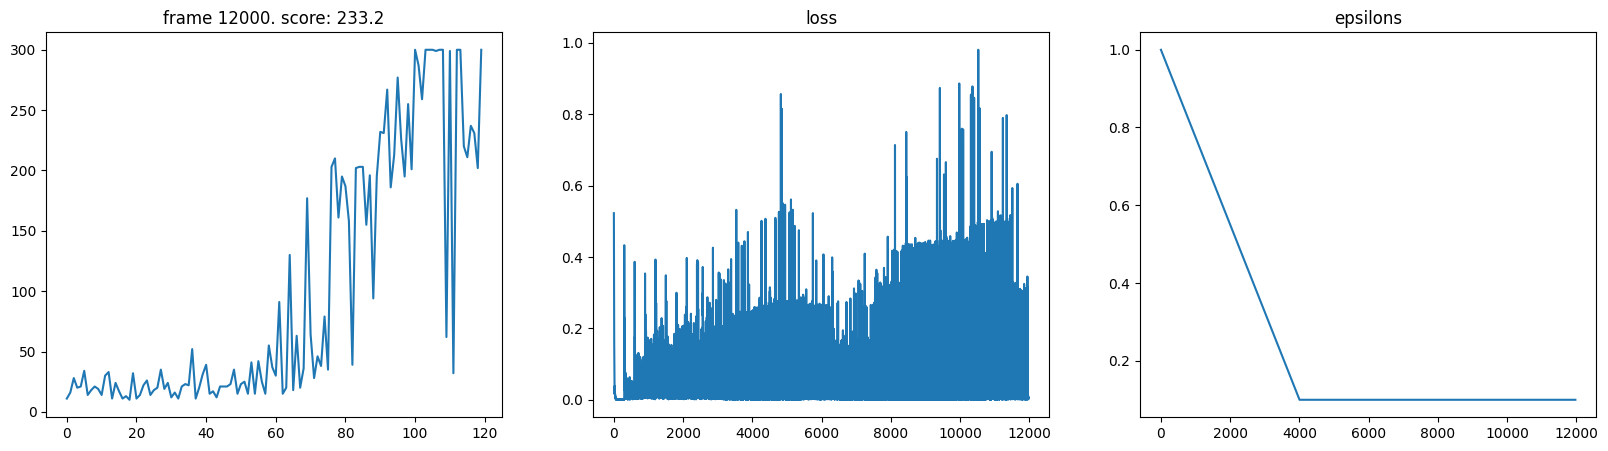


...End of training...

Resume
Episode - Tot frame -  Score Episode
(10, 202, 19.0)
(20, 397, 32.0)
(30, 600, 24.0)
(40, 819, 31.0)
(50, 1038, 15.0)
(60, 1331, 37.0)
(70, 1931, 177.0)
(80, 2990, 195.0)
(90, 4622, 195.0)
(100, 6905, 201.0)
(110, 9612, 62.0)
(120, 11944, 300.0)


In [ ]:
agent.train(num_frames)
#Commenti:
#https://wandb.ai/peacekurella/Hitchiker-s-Guide-to-the-Galaxy-of-Reinforcement-Learning/reports/A-Brief-Overview-of-DQN-training--Vmlldzo1NTk5Mjk#:~:text=One%20interesting%20phenomenon%20to%20watch,and%20the%20policy%20network%20synchronize.


#### Test DQN

In [ ]:
video_folder="videos/dqn"
agent.test(video_folder=video_folder)


Moviepy - Building video /content/videos/dqn/rl-video-episode-0.mp4.
Moviepy - Writing video /content/videos/dqn/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/dqn/rl-video-episode-0.mp4
score:  300.0


In [ ]:
import base64
import glob
import io
import os

from IPython.display import HTML, display


def ipython_show_video(path: str) -> None:
    """Show a video at `path` within IPython Notebook."""
    if not os.path.isfile(path):
        raise NameError("Cannot access: {}".format(path))

    video = io.open(path, "r+b").read()
    encoded = base64.b64encode(video)

    display(HTML(
        data="""
        <video width="320" height="240" alt="test" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4"/>
        </video>
        """.format(encoded.decode("ascii"))
    ))


def show_latest_video(video_folder: str) -> str:
    """Show the most recently recorded video from video folder."""
    list_of_files = glob.glob(os.path.join(video_folder, "*.mp4"))
    latest_file = max(list_of_files, key=os.path.getctime)
    ipython_show_video(latest_file)
    return latest_file


latest_file = show_latest_video(video_folder=video_folder)
print("Played:", latest_file)

##Gradient Monte Carlo target control

In this section the Gradient Monte Carlo target control algorithm is implemented, using a network of smaller sizes than the one used in the DQN section (and with a greater number of episodes for training).

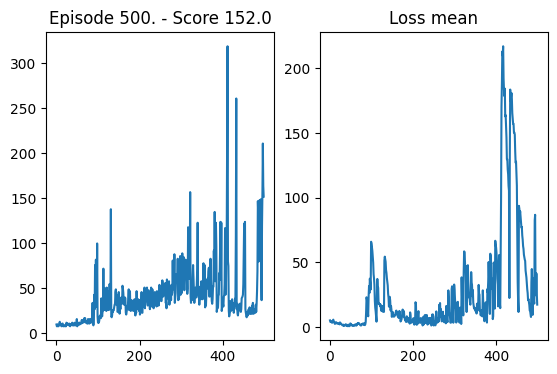

In [ ]:
class QNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

def epsilon_greedy_policy(q_values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(q_values))
    else:
        return np.argmax(q_values)

def gradient_monte_carlo_control(env, q_net, optimizer, num_episodes, gamma=1.0, epsilon=0.1):

    q_net.train()

    scores = []
    losses = []

    for episode in range(1,num_episodes+1):
        state,_ = env.reset()
        #In the recent versions of OpenAI gym, env.reset() returns a tuple of (observation, info)
        # and not just observation

        rewards = []
        states = []
        actions = []

        done = False
        #trunc = False
        # "trunc"  is used to avoid peaks in scores during the training, example score = 100_000.
        # Setting the score limit to "max_episode_steps".

        #while done== False and trunc == False:
        while done== False:
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            q_values = q_net(state_tensor).detach().numpy().squeeze()
            action = epsilon_greedy_policy(q_values, epsilon)

            states.append(state)
            actions.append(action)

            next_state, reward, done, trunc, _ = env.step(action)
            rewards.append(reward)
            state = next_state

        # Calculate returns
        returns = []
        G = 0
        for reward in reversed(rewards):
            G = reward + gamma * G
            returns.insert(0, G)

        # Update Q-network
        loss_mean = 0
        optimizer.zero_grad()
        for state, action, G in zip(states, actions, returns):
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            G_tensor = torch.FloatTensor([G])
            q_values = q_net(state_tensor)
            q_value = q_values[0, action]
            loss = abs(q_value - G_tensor)
            loss_mean += loss
            loss.backward()
            optimizer.step()

        losses.append(loss_mean.detach().numpy()/len(states))
        scores.append(returns[0])

        if (episode % 50) == 0:
            #print(f"Episode {episode + 1}/{num_episodes}, Loss: {loss.item()}, Score : {returns[0]}")
            clear_output(True)
            plt.figure(figsize=(12, 5))
            plt.subplot(131)
            plt.title('Episode %s. - Score %s' % (episode,scores[episode-1]))
            plt.plot(scores)
            plt.subplot(132)
            plt.title('Episode %s. - Loss mean %s' % (episode,losses[episode-1]))
            plt.plot(losses)
            plt.show()

env = gym.make('CartPole-v1', max_episode_steps=300)
input_dim = env.observation_space.shape[0]
hidden_dim = 128
output_dim = env.action_space.n
q_net = QNetwork(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(q_net.parameters(), lr=0.001)

num_episodes = 500
gradient_monte_carlo_control(env, q_net, optimizer, num_episodes)


In [ ]:
def evaluate_policy(env, q_net, num_episodes):
    q_net.eval()
    total_rewards = []

    for episode in range(num_episodes):
        state,_ = env.reset()
        total_reward = 0
        done = False

        while not done:
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            q_values = q_net(state_tensor).detach().numpy().squeeze()
            action = np.argmax(q_values)

            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            state = next_state

        total_rewards.append(total_reward)

    average_reward = np.mean(total_rewards)
    return average_reward

# Evaluate the trained policy
evaluation_episodes = 100
average_reward = evaluate_policy(env, q_net, evaluation_episodes)
print(f"Average Reward over {evaluation_episodes} episodes: {average_reward}")

Average Reward over 100 episodes: 575.99


#### Test MC

In [ ]:
video_folder="videos/dqn"

def campione_test(video_folder: str) -> None:
        env = gym.make("CartPole-v1",  render_mode="rgb_array")
        # for recording a video
        naive_env = env
        env = gym.wrappers.RecordVideo(env, video_folder=video_folder)

        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            q_values = q_net(state_tensor).detach().numpy().squeeze()
            action = np.argmax(q_values)

            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            state = next_state

        print("Score: ", total_reward)


        env.close()

        # reset
        env = naive_env

campione_test(video_folder=video_folder)

Moviepy - Building video /content/videos/dqn/rl-video-episode-0.mp4.
Moviepy - Writing video /content/videos/dqn/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/dqn/rl-video-episode-0.mp4
Score:  30228.0


In [ ]:
import base64
import glob
import io
import os

from IPython.display import HTML, display

env = gym.make("CartPole-v1", max_episode_steps=300, render_mode="rgb_array")

def ipython_show_video(path: str) -> None:
    """Show a video at `path` within IPython Notebook."""
    if not os.path.isfile(path):
        raise NameError("Cannot access: {}".format(path))

    video = io.open(path, "r+b").read()
    encoded = base64.b64encode(video)

    display(HTML(
        data="""
        <video width="320" height="240" alt="test" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4"/>
        </video>
        """.format(encoded.decode("ascii"))
    ))


def show_latest_video(video_folder: str) -> str:
    """Show the most recently recorded video from video folder."""
    list_of_files = glob.glob(os.path.join(video_folder, "*.mp4"))
    latest_file = max(list_of_files, key=os.path.getctime)
    ipython_show_video(latest_file)
    return latest_file


latest_file = show_latest_video(video_folder=video_folder)
print("Played:", latest_file)

Played: videos/dqn/rl-video-episode-0.mp4


## DQN with imitative mode

In this section, the network implemented with the Gradient Monte Carlo target control algorithm helps, in imitation mode every 5 steps, the DQN network (Note, for this training, a smaller number of episodes was used compared to classical DQN training)

### DQN Agent with imitative mode



In [ ]:
class DQNAgent:
    """DQN Agent interacting with environment.

    Attribute:
        env (gym.Env): openAI Gym environment
        memory (ReplayBuffer): replay memory to store transitions
        batch_size (int): batch size for sampling
        epsilon (float): parameter for epsilon greedy policy
        epsilon_decay (float): step size to decrease epsilon
        max_epsilon (float): max value of epsilon
        min_epsilon (float): min value of epsilon
        target_update (int): period for target model's hard update
        gamma (float): discount factor
        dqn (Network): model to train and select actions
        dqn_target (Network): target model to update
        optimizer (torch.optim): optimizer for training dqn
        transition (list): transition information including
                           state, action, reward, next_state, done
    """

    def __init__(
        self,
        env: gym.Env,
        memory_size: int,
        batch_size: int,
        target_update: int,
        epsilon_decay: float,
        max_epsilon: float = 1.0,
        min_epsilon: float = 0.1,
        gamma: float = 0.95,
    ):
        """Initialization.

        Args:
            env (gym.Env): openAI Gym environment
            memory_size (int): length of memory
            batch_size (int): batch size for sampling
            target_update (int): period for target model's hard update
            epsilon_decay (float): step size to decrease epsilon
            lr (float): learning rate
            max_epsilon (float): max value of epsilon
            min_epsilon (float): min value of epsilon
            gamma (float): discount factor
        """
        obs_dim = env.observation_space.shape[0]
        action_dim = env.action_space.n

        self.env = env
        self.memory = ReplayBuffer(obs_dim, memory_size, batch_size)
        self.batch_size = batch_size
        self.epsilon = max_epsilon
        self.epsilon_decay = epsilon_decay
        self.max_epsilon = max_epsilon
        self.min_epsilon = min_epsilon
        self.target_update = target_update
        self.gamma = gamma

        # device: cpu / gpu
        self.device = torch.device(
            "cuda" if torch.cuda.is_available() else "cpu"
        )

        # networks: dqn, dqn_target
        self.dqn = Network(obs_dim, action_dim).to(self.device)
        self.dqn_target = Network(obs_dim, action_dim).to(self.device)
        self.dqn_target.load_state_dict(self.dqn.state_dict())
        self.dqn_target.eval()


        # optimizer
        self.optimizer = optim.Adam(self.dqn.parameters())

        # transition to store in memory
        self.transition = list()

        # mode: train / test
        self.is_test = False

    def select_action(self, state, frame_idx = num_frames) :

        #imitative mode
        if frame_idx % 5 == 0: # < (num_frames/2):
              state_tensor = torch.FloatTensor(state).unsqueeze(0)
              q_values = q_net(state_tensor).detach().numpy().squeeze()
              selected_action = np.argmax(q_values)

        else:
        # epsilon greedy policy
          if self.epsilon > np.random.random():
              selected_action = self.env.action_space.sample()
          else:
            selected_action = self.dqn(
                torch.FloatTensor(state).to(self.device)
            ).argmax()
            selected_action = selected_action.detach().cpu().numpy()

        if not self.is_test:
            self.transition = [state, selected_action]

        return selected_action

    def step(self, action: np.ndarray) -> Tuple[np.ndarray, np.float64, bool]:
        """Take an action and return the response of the env."""
        next_state, reward, terminated, truncated, _ = self.env.step(action)
        done = terminated or truncated

        if not self.is_test:
            self.transition += [reward, next_state, done]
            self.memory.store(*self.transition)

        return next_state, reward, done

    def update_model(self) -> torch.Tensor:
        """Update the model by gradient descent."""
        samples = self.memory.sample_batch()

        loss = self._compute_dqn_loss(samples)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return loss.item()

    def train(self, num_frames: int, plotting_interval: int = 200):
        """Train the agent."""
        self.is_test = False

        state, _ = self.env.reset()
        update_cnt = 0
        epsilons = []
        losses = []
        scores = []
        deb_list = []
        score = 0
        ep=1


        for frame_idx in range(1, num_frames + 1):

            action = self.select_action(state, frame_idx)

            next_state, reward, done = self.step(action)

            state = next_state
            score += reward

            # if episode ends
            if done:
                state, _ = self.env.reset()
                scores.append(score)
                # Debug
                if ep % 10 == 0:
                  deb_list.append((ep, frame_idx, score))
                ep+=1
                score = 0

            # if training is ready
            if len(self.memory) >= self.batch_size:
                loss = self.update_model()
                losses.append(loss)
                update_cnt += 1

                # linearly decrease epsilon
                self.epsilon = max(
                    self.min_epsilon, self.epsilon - (
                        self.max_epsilon - self.min_epsilon
                    ) * self.epsilon_decay
                )
                epsilons.append(self.epsilon)

                # if hard update is needed
                if update_cnt % self.target_update == 0:
                    self._target_hard_update()

            # plotting
            if frame_idx % plotting_interval == 0:
                self._plot(frame_idx, scores, losses, epsilons)

        self.env.close()

        print('\n...End of training...\n')


    def test(self, video_folder: str) -> None:
        """Test the agent."""
        self.is_test = True

        # for recording a video
        naive_env = self.env
        self.env = gym.wrappers.RecordVideo(self.env, video_folder=video_folder)

        state, _ = self.env.reset()
        done = False
        score = 0

        while not done:
            action = self.select_action(state)
            next_state, reward, done = self.step(action)

            state = next_state
            score += reward

        print("score: ", score)
        self.env.close()

        # reset
        self.env = naive_env

    def test_avr_100(self):
        """Test the agent."""
        self.is_test = True

        total_rewards = []

        for e in range(1,100+1):
          state, _ = self.env.reset()
          done = False
          score = 0

          while not done:
             action = self.select_action(state)
             next_state, reward, done = self.step(action)

             state = next_state
             score += reward

          total_rewards.append(score)

        average_reward = np.mean(total_rewards)
        self.env.close()
        return average_reward



    def _compute_dqn_loss(self, samples: Dict[str, np.ndarray]) -> torch.Tensor:
        """Return dqn loss."""
        device = self.device  # for shortening the following lines
        state = torch.FloatTensor(samples["obs"]).to(device)
        next_state = torch.FloatTensor(samples["next_obs"]).to(device)
        action = torch.LongTensor(samples["acts"].reshape(-1, 1)).to(device)
        reward = torch.FloatTensor(samples["rews"].reshape(-1, 1)).to(device)
        done = torch.FloatTensor(samples["done"].reshape(-1, 1)).to(device)

        # G_t   = r + gamma * v(s_{t+1})  if state != Terminal
        #       = r                       otherwise
        curr_q_value = self.dqn(state).gather(1, action)
        next_q_value = self.dqn_target(
            next_state
        ).max(dim=1, keepdim=True)[0].detach()
        mask = 1 - done
        #if done == True then mask == 0 -> target = reward
        target = (reward + self.gamma * next_q_value * mask).to(self.device)

        # calculate dqn loss
        loss =   F.smooth_l1_loss(curr_q_value, target)


        return loss

    def _target_hard_update(self):
        """Hard update: target <- local."""
        self.dqn_target.load_state_dict(self.dqn.state_dict())

    def _plot(
        self,
        frame_idx: int,
        scores: List[float],
        losses: List[float],
        epsilons: List[float],
    ):
        """Plot the training progresses."""
        clear_output(True)
        plt.figure(figsize=(20, 5))
        plt.subplot(131)
        plt.title('frame %s. score: %s' % (frame_idx, np.mean(scores[-10:])))
        plt.plot(scores)
        plt.subplot(132)
        plt.title('loss')
        plt.plot(losses)
        plt.subplot(133)
        plt.title('epsilons')
        plt.plot(epsilons)
        plt.show()



### Parametri ed inizializzazioni

In [ ]:
# environment
env = gym.make("CartPole-v1", max_episode_steps=300, render_mode="rgb_array")


# parameters
num_frames = 6_000
memory_size = 600
batch_size = 32
target_update = 300
epsilon_decay = 1 / 3_000

agent = DQNAgent(env, memory_size, batch_size, target_update, epsilon_decay)

### Train

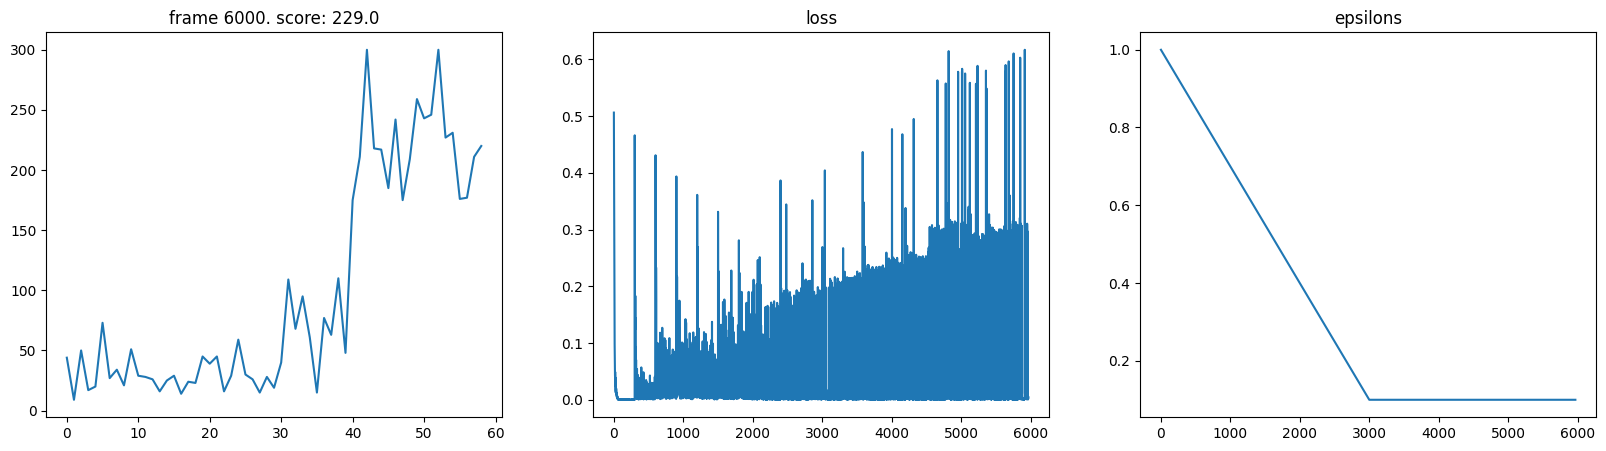


...End of training...



In [ ]:
agent.train(num_frames)

#### Test

In [ ]:
video_folder="videos/dqn"
agent.test(video_folder=video_folder)


Moviepy - Building video /content/videos/dqn/rl-video-episode-0.mp4.
Moviepy - Writing video /content/videos/dqn/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/dqn/rl-video-episode-0.mp4
score:  300.0


In [ ]:
r = agent.test_avr_100()
print("Average score over 100 episodes:",r)

Average score over 100 episodes: 231.48
